# Rate equations

\begin{align}
\frac{d[PA]}{dt} &= k_L ([PA]_{max} - [PA])- k_T [PA]([WA]_{max} - [WA]) - k_P [E][PA] \\
\frac{d[WA]}{dt} &= k_T [PA] ([WA]_{max} - [WA]) - k_N [E][WA]^2 - k_P [E][WA] \\
\frac{d[E]}{dt} &= k_N [E] [WA]^2 - k_C [E]
\end{align}

In [123]:
from numpy import array, zeros, arange, sqrt
def nucleation(load_rate = 10.0, transfer_rate = 1.0, 
               elongation_rate = 100.0, nucleation_rate = 1.0, capping_rate = 0.1, 
               ppr_max = 1.0, wh2_max = 1.0, total_time = 300.0):
    time_interval = 1e-3
    time_row = arange(0.0, total_time, time_interval)
    no_points = len(time_row)
    ppr_row = zeros(no_points)
    wh2_row = zeros(no_points)
    ends_row = zeros(no_points)
    ends_row[0] = 1.0
    # Check constraint
    wh2_eq = sqrt(capping_rate / nucleation_rate)
    a = elongation_rate * (capping_rate + elongation_rate * wh2_eq)
    b = (load_rate + transfer_rate * (wh2_max - wh2_eq)) * (capping_rate + elongation_rate * wh2_eq)
    c = - load_rate * transfer_rate * (wh2_max - wh2_eq) * ppr_max
    ends_eq = (-b + sqrt(b**2 - 4 * a * c)) / (2 * a)
    if ends_eq < 0.0:
        ends_eq = (-b -sqrt(b**2 - 4 * a * c)) / (2 * a)
    print(ends_eq)
    for i in range(0, no_points - 1):
        load_change = load_rate * (ppr_max - ppr_row[i])
        transfer_change = transfer_rate * ppr_row[i] * (wh2_max - wh2_row[i])
        ppr_elongation_change = elongation_rate * ends_row[i] * ppr_row[i]
        wh2_elongation_change = elongation_rate * ends_row[i] * wh2_row[i]
        nucleation_change = nucleation_rate * ends_row[i] * wh2_row[i]**2
        capping_change = capping_rate * ends_row[i]
        ppr_change = load_change - transfer_change - ppr_elongation_change
        wh2_change = transfer_change - nucleation_change - wh2_elongation_change
        ends_change = nucleation_change - capping_change
        ppr_row[i + 1] = ppr_row[i] + ppr_change * time_interval
        wh2_row[i + 1] = wh2_row[i] + wh2_change * time_interval
        ends_row[i + 1] = ends_row[i] + ends_change * time_interval
    return time_row, ppr_row, wh2_row, ends_row

def nucleation2(load_rate = 10.0, transfer_rate = 1.0, 
               elongation_rate = 100.0, nucleation_rate = 1.0, capping_rate = 0.1, 
               ppr_max = 1.0, wh2_max = 1.0):
    wh2_eq = sqrt(capping_rate / nucleation_rate)
    # Set up quadratic.
    a = elongation_rate * (capping_rate + elongation_rate * wh2_eq)
    b = (load_rate + transfer_rate * (wh2_max - wh2_eq)) * (capping_rate + elongation_rate * wh2_eq)
    c = - load_rate * transfer_rate * (wh2_max - wh2_eq) * ppr_max
    if (b**2 - 4 * a * c < 0):
        print("Non-real solution")
    ends_eq = (-b + sqrt(b**2 - 4 * a * c)) / (2 * a)
    if ends_eq < 0.0:
        ends_eq = (-b - sqrt(b**2 - 4 * a * c)) / (2 * a)
    if ends_eq < 0.0:
        print("Network failed to assemble")
    ppr_eq = load_rate * ppr_max / (load_rate + elongation_rate * ends_eq + transfer_rate * (wh2_max - wh2_eq))
    return ppr_eq, wh2_eq, ends_eq

In [135]:
# Check monomer gating.
capping_rate_row = arange(0.1, 100.0, 1)
no_points = len(capping_rate_row)
ppr_eq_row = zeros(no_points)
wh2_eq_row = zeros(no_points)
ends_eq_row = zeros(no_points)
for i in range(no_points):
    i_ppr_eq, i_wh2_eq, i_ends_eq = nucleation2(ppr_max = 10.0, wh2_max = 10.0, capping_rate = capping_rate_row[i])
    ppr_eq_row[i] = i_ppr_eq
    wh2_eq_row[i] = i_wh2_eq
    ends_eq_row[i] = i_ends_eq

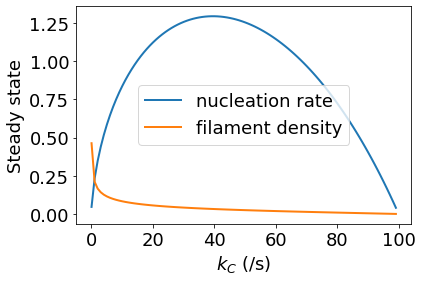

In [136]:
%matplotlib inline
from matplotlib.pyplot import subplots
figure_handle, axes_handle = subplots()
axes_handle.plot(capping_rate_row, ends_eq_row * wh2_eq_row**2, linewidth = 2, label = 'nucleation rate')
axes_handle.plot(capping_rate_row, ends_eq_row, linewidth = 2, label = 'filament density')
axes_handle.tick_params(labelsize = 18)
axes_handle.set_xlabel(r'$k_C$ (/s)', fontsize = 18)
axes_handle.set_ylabel('Steady state', fontsize = 18)
axes_handle.legend(fontsize = 18)